# Business Problem

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('student_info.csv')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
272,5.05,70.67
273,5.85,75.02
274,5.45,70.96
275,7.96,83.33
276,6.51,74.75


In [5]:
df.shape

(277, 2)

## Discover and visualize the data to gain insights

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    271 non-null    float64
 1   student_marks  277 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


In [7]:
df.describe()

,study_hours,student_marks
count,271.000000,277.000000
mean,6.690738,76.097148
std,1.531162,9.325526
min,0.800000,25.870000
25%,5.505000,72.080000
50%,6.750000,77.190000
75%,7.950000,82.180000
max,8.990000,97.790000


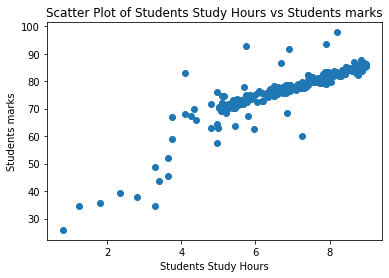

In [8]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

## Prepare the data for Machine Learning algorithms 

In [9]:
# Data Cleaning

In [10]:
df.isnull().sum()

study_hours      6
student_marks    0
dtype: int64

In [11]:
df.mean()

study_hours       6.690738
student_marks    76.097148
dtype: float64

In [12]:
df2 = df.fillna(df.mean())

In [13]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [14]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.690738,78.68
3,5.670000,71.82
4,8.670000,84.19


In [15]:
# split dataset

In [16]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (277, 1)
shape of y =  (277, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (249, 1)
shape of y_train =  (249, 1)
shape of X_test =  (28, 1)
shape of y_test =  (28, 1)


# Select a model and train it

In [18]:
 # y = m * x + c
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr.coef_

array([[5.32180102]])

In [21]:
lr.intercept_

array([40.58162597])

In [22]:
m = 5.42
c = 39.62
y  = m * 4 + c 
y

61.3

In [23]:
lr.predict([[4]])[0][0].round(2)

61.87

In [24]:
y_pred  = lr.predict(X_test)
y_pred

array([[84.53970241],
       [82.03845593],
       [67.19063108],
       [76.61021889],
       [68.57429934],
       [53.08785837],
       [81.39983981],
       [82.9431621 ],
       [70.75623776],
       [69.26613348],
       [82.62385404],
       [78.57928527],
       [68.25499128],
       [75.49264067],
       [83.52856022],
       [82.09167394],
       [88.42461716],
       [84.96544649],
       [87.36025695],
       [76.50378287],
       [79.05824736],
       [86.93451287],
       [67.66959317],
       [80.01617154],
       [70.54336572],
       [72.08668802],
       [70.64980174],
       [82.51741802]])

In [25]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.26,81.70,84.539702
1,7.79,79.17,82.038456
2,5.00,62.99,67.190631
3,6.77,76.70,76.610219
4,5.26,71.86,68.574299
5,2.35,39.16,53.087858
6,7.67,80.58,81.399840
7,7.96,83.33,82.943162
8,5.67,71.82,70.756238
9,5.39,70.90,69.266133


## Fine-tune your model

In [26]:
lr.score(X_test,y_test)*100

86.3453726883981

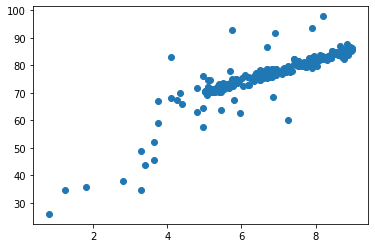

In [27]:
plt.scatter(X_train,y_train)

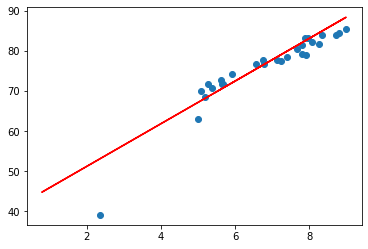

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

## Present your solution

## Save ML Model

In [29]:
import joblib
joblib.dump(lr, "Students_Score_Predictor.pkl")

['Students_Score_Predictor.pkl']

In [30]:
model = joblib.load("Students_Score_Predictor.pkl")

In [32]:
model.predict([[11]])[0][0].round(2)

99.12

#### Now Let's Launch, monitor, and maintain the system